# NBA Data Visualization

Before you can work with the NBA data set, you will need to load the R packages that contains the tools for working with it.

Use the library() function to load the package. In this case we’ve loaded the dplyr and ggplot2 packages for you.

In [4]:
library(dplyr)
library(ggplot2)
print('Packages Loaded')

[1] "Packages Loaded"


In [5]:
nba = read.csv('all_seasons.csv')

In [6]:
head(nba)

X,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,gp,pts,reb,ast,season
0,Chris Robinson,VAN,23,195.58,90.7184,Western Kentucky,USA,1996,2,41,4.6,1.7,1.6,1996-97
1,Matt Fish,MIA,27,210.82,106.5941,North Carolina-Wilmington,USA,1992,2,6,0.3,0.8,0.0,1996-97
2,Matt Bullard,HOU,30,208.28,106.5941,Iowa,USA,Undrafted,Undrafted,71,4.5,1.6,0.9,1996-97
3,Marty Conlon,BOS,29,210.82,111.1300,Providence,USA,Undrafted,Undrafted,74,7.8,4.4,1.4,1996-97
4,Martin Muursepp,DAL,22,205.74,106.5941,None,USA,1996,1,42,3.7,1.6,0.5,1996-97
5,Martin Lewis,TOR,22,198.12,102.0582,Seward County Community College,USA,1995,2,9,1.6,0.7,0.4,1996-97


### Understanding NBA data frame

Now that we have loaded the nba data set, you can start examining and understanding it.

How many observations (rows) are in the data set?

In [7]:
#your code here

How many variables (columns) are in the data set?

In [9]:
#your code here

How many unique seasons are in the nba data set?

In [11]:
#your code here

The nba data set covers from the _______ season to the _______ season?

In [13]:
#your code here

### Basic template

The basic template that will be used when using ggplot2, on a basic level is as follows.

ggplot(data = DATA_SET) + 

   GEOM_FUNCTION(mapping = aes(MAPPINGS))

- DATA_SET: In the case of this lab will be 'nba' data set is where the DATA_SET of interest is placed.
- GEOM_FUNCTION: specifies the type of graph. Common functions include: geom_point() ~ scatter plot, geom_smooth() ~ plots line to trend, geom_bar ~ plots barcharts, and geom_boxplot() ~ plots box plots.
- MAPPINGS: where the x and y varibles are assigned values of columns from your data of interest ('nba'). Ex. (x = column1, y = column2)

# Problem 1

In the NBA, height is considered very important, in the last lab we discovered that the average height in the NBA over the 21 seasons was nearly 6.6 feet. Height matters most for players whose primary role is to rebound the ball. Let's use a basic ggplot scatter plot to see if there is a relationship between height and number of rebounds. But first, we need to create a new column with height converted to feet. 

#### Instructions

In [15]:
#creates 'player_height_ft' column
nba <- nba %>%
  mutate(player_height_ft = player_height/30.48)

You can also set the aesthetic properties of your geom manually, as I did below, making all of the points in our plot blue. More options include different symbols and sizes, including colors. You can also use symbols, size, and color to represent another variable/column of data in your plot in order to convey more information. This lab contains examples of that using color. For more detail on aesthetic mapping, follow the <a href="https://r4ds.had.co.nz/data-visualisation.html#aesthetic-mappings" target="_blank">link</a>.

#### Basic geom_point

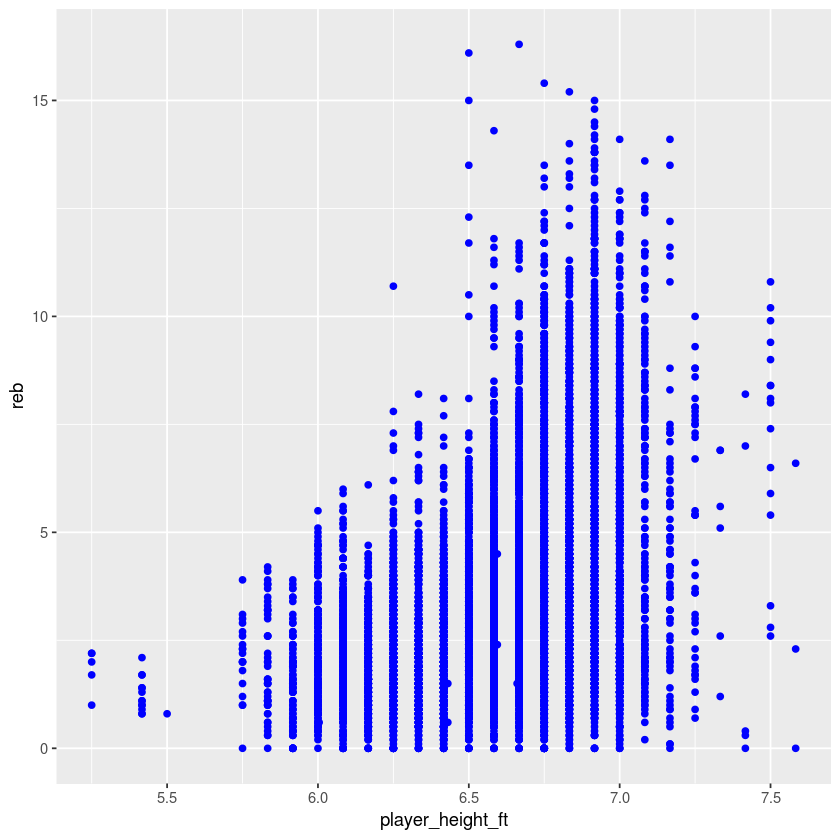

In [16]:
ggplot(data = nba) + 
  geom_point(mapping = aes(x = player_height_ft, y = reb), color = "blue")

As we can see from the scatter plot, as height increases in ft, the number of rebounds increases. This confirms our hypothesis that taller players get more rebounds. 

#### Basic geom_smooth

Let us use a different visual context to describe the exact same x and y variable using the geom_smooth() function this time instead of the geom_point() function.

`geom_smooth()` using method = 'gam'


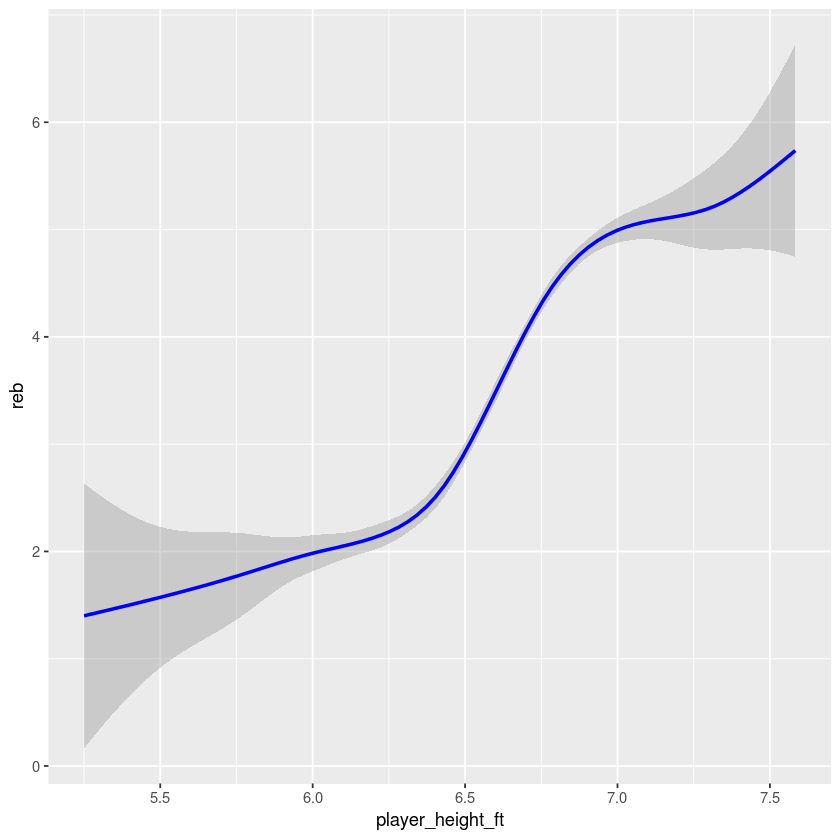

In [17]:
ggplot(data = nba) + 
  geom_smooth(mapping = aes(x = player_height_ft, y = reb), color = "blue")

Each geom provides a unique way to veiw the exact same x and y variable.

### Common Mistakes

Notice how the code below is identical in substance but different in format. When you run the code you will notice an error, the placement of the '+' matters. It has to come at the END of the line.

ERROR: Error in +geom_point(mapping = aes(x = player_height_ft, y = reb)): invalid argument to unary operator


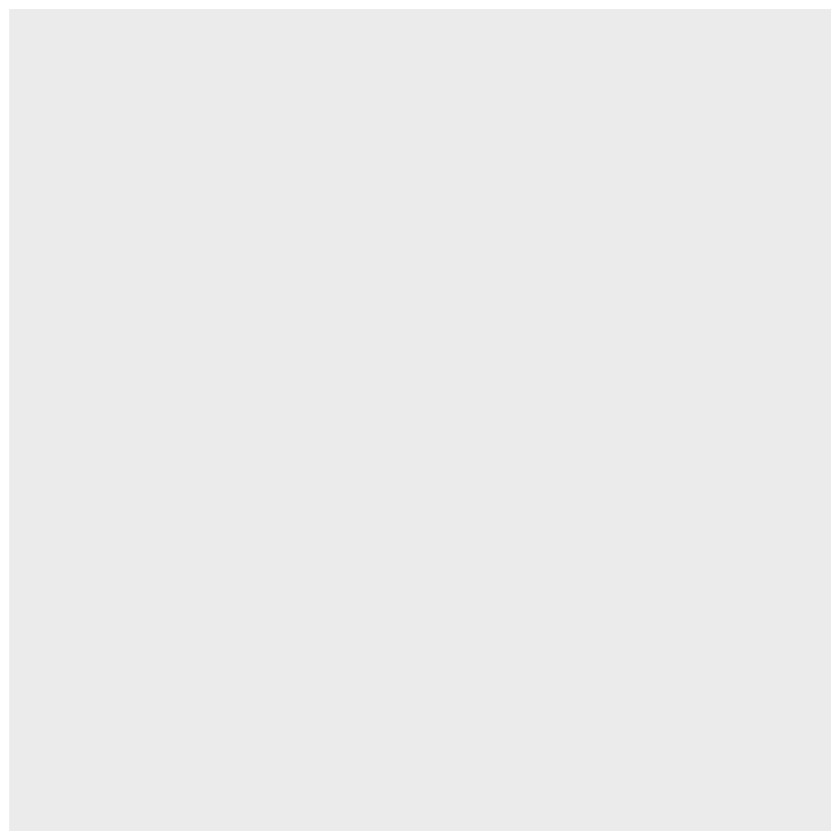

In [7]:
ggplot(data = nba)
  + geom_point(mapping = aes(x = player_height_ft, y = reb))

#### Question 1

Above we concluded that height has a positive linear correlation to number of rebounds, but, can the same be said for points and assists? On your own, create a scatter plot comparing height in ft to points and height in feet to assists, and give a brief conclusion on the relationships. 

In [19]:
#scatter plot height_ft ~ pts

#your code here
#conclusion:

#### Question 2

In [21]:
#scatter plot height_ft ~ ast

#your code here
#conclusion:

# Problem 2

The basic scatter plots we came up with in Problem 1 were good, but they could be more interesting. The ggplot2 library allows you to change the aesthetic of the points in a way that conveys information. Let us look at the 2013-14 season to explore the point aesthetics. 

#### Question 1

Subset all the data for the 2013-14 season into a variable called 'season13_14'. Perform the head() function on your data to make sure it is correct. 

In [23]:
#your code here

#### Instructions

Let us reproduce the graph from Problem 1 that compares height in ft and rebounds for the season13_14 data set. But, this time lets make the color of the point represent which team the player plays for instead of having the color just be blue. 
- Note: The color variable is grouped with the x and y when representing a column instead of outside when representing a single color. 

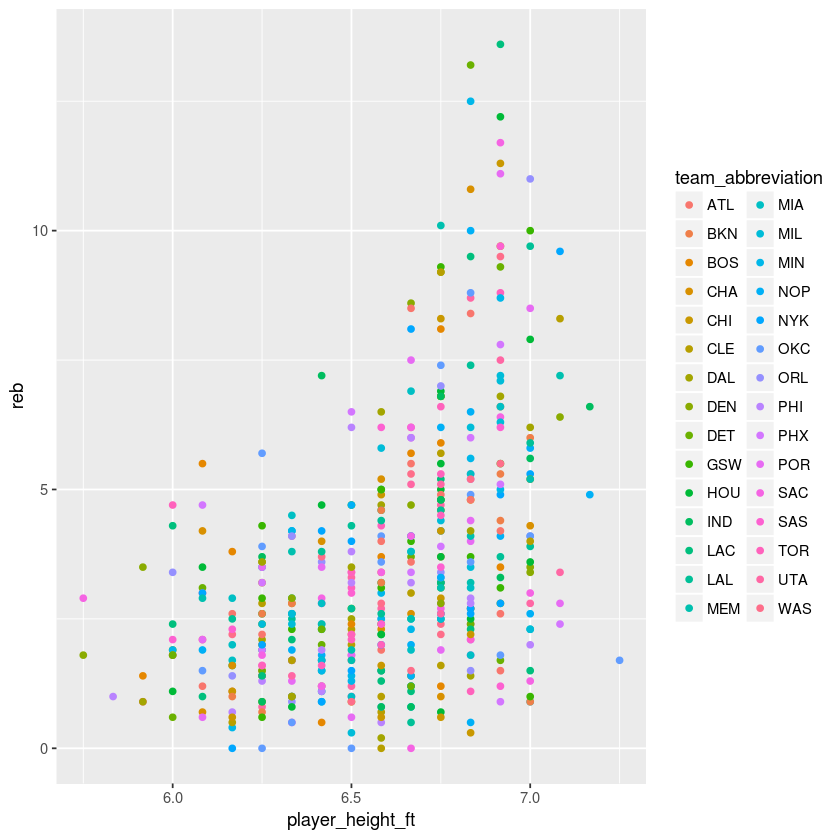

In [25]:
ggplot(data = season13_14) + 
  geom_point(mapping = aes(x = player_height_ft, y = reb, color = team_abbreviation)) 

As you can see above, our scatter plot now conveys more data than it did before. But, is the data really relevent to the scatter plot? Not really, and there are 30 different teams in the NBA making the plot difficult to decipher and effectively convey information. An example of something that would be relevent and easily convey information is coloring each point by player position. There are only three positions: guard, center, and forward. Unfortunately, our data does not contain this information.

#### Question 2

Two of the most important characteristics a team looks for in a player they are about to draft is the ability to score points and make assists. The players that do this the most effectively most likely were drafted in the first, maybe the second round, or, in some cases, undrafted. Produce a scatter plot comparing points and assists, with the color aesthetic set to draft round for the season13_14 data set. Then make a statement based on our hypothesis that players who are drafted in the 1st round have the highest points/assists. 

In [26]:
#your code here

#statement:

#### Question 3

Use the geom_smooth() function to reproduce the plot above. Does it make much of a difference in how the graph conveys information? In your opinion which is better and why?

In [28]:
#your code here

#Statements:

# Problem 3

In the last lab, we worked to refute an argument that the average player in today’s NBA is bigger and stronger than the average player in past generations of the NBA. We did this by producing a chart looking at the average player height in ft grouped by season, average player weight in pounds grouped by season, and average player BMI grouped by season. All three of these observations are made over a time period. Using the ggplot2 geom function geom_boxplot() we will visualize the trend for all 3 groupings providing us a more effective way to reach a conclusion than in our last lab. 

#### Instructions

First let's reproduce the average player height in ft grouped by season chart and recall that this alone was how we analyzed our data. 

In [30]:
nba %>% group_by(season) %>% summarize(avgheight_ft = mean(player_height_ft))

season,avgheight_ft
1996-97,6.594319
1997-98,6.582005
1998-99,6.591306
1999-00,6.591895
2000-01,6.586357
2001-02,6.595076
2002-03,6.611565
2003-04,6.604827
2004-05,6.602550
2005-06,6.591885


Using boxplots, we will be able to check the same trend without needing to group the data at all, visualizing our data directly from our nba data set.

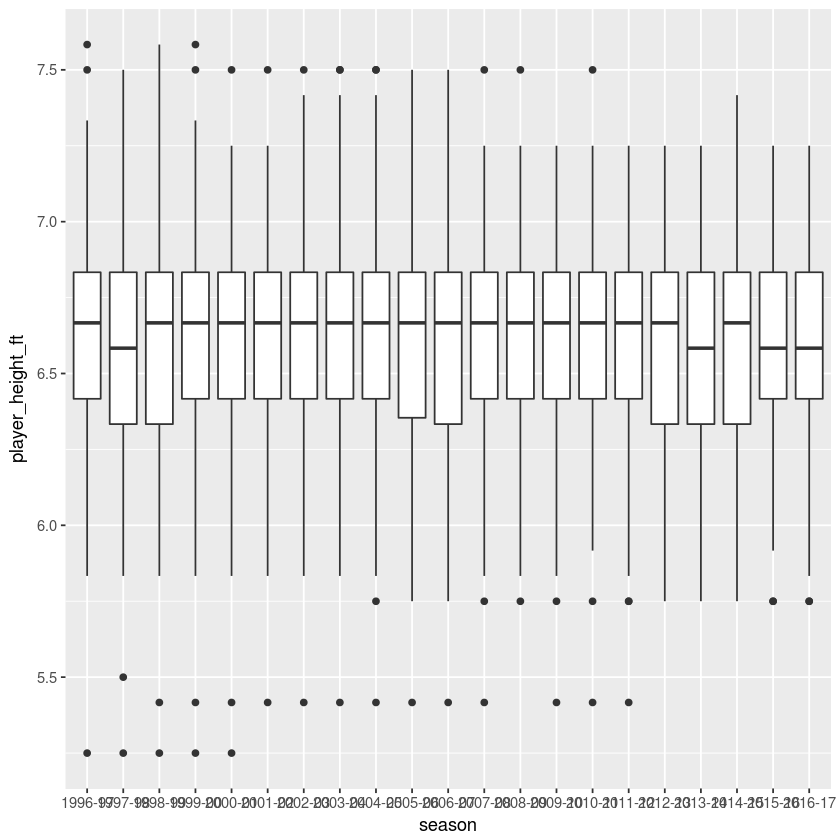

In [31]:
ggplot(data = nba, mapping = aes(x = season, y = player_height_ft)) + 
geom_boxplot() 

This method has produced a graph that provides the same information that our grouping did. But notice, the entries on the x-coordinate for season are difficult to read. You can solve this one of two ways, by switching the x and y coordinates manually, or by adding '+ coord_flip()' function to the geom string(method I chose below). 

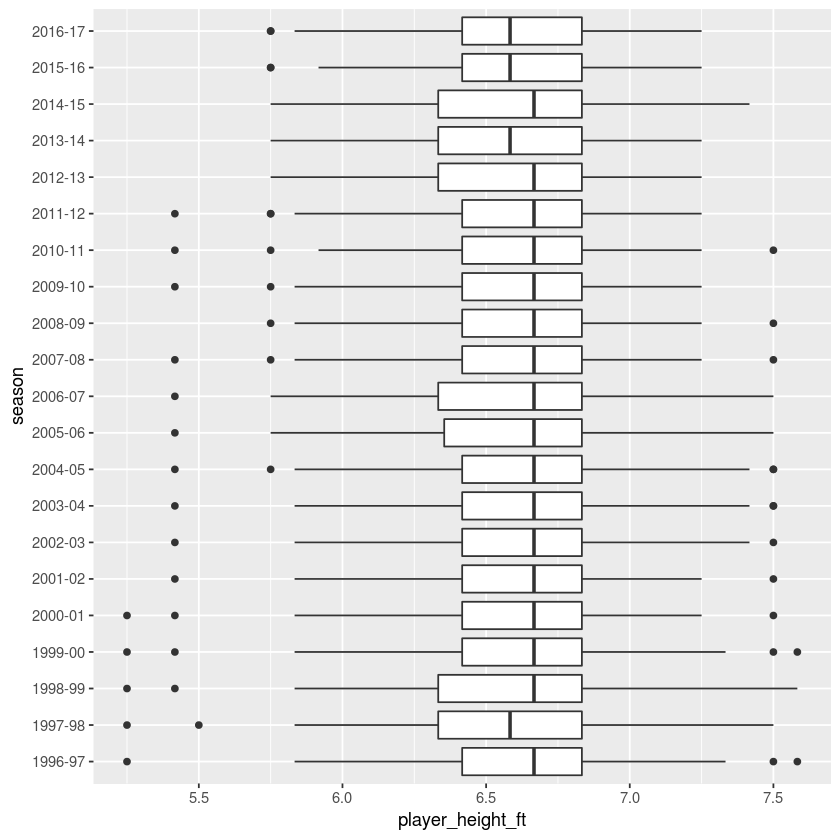

In [32]:
ggplot(data = nba, mapping = aes(x = season, y = player_height_ft)) + 
geom_boxplot() +
coord_flip()

#### Question 1

On your own, reproduce a geom_function that produces a similar graph above but in order to visualize weight in pounds by season. Below, I have provided the conversion and creation of the 'player_weight_lbs' column via a mutate function. 

In [33]:
nba <- nba %>%
  mutate(player_weight_lbs = player_weight/.453592)
head(nba)

X,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,gp,pts,reb,ast,season,player_height_ft,player_weight_lbs
0,Chris Robinson,VAN,23,195.58,90.7184,Western Kentucky,USA,1996,2,41,4.6,1.7,1.6,1996-97,6.416667,200
1,Matt Fish,MIA,27,210.82,106.5941,North Carolina-Wilmington,USA,1992,2,6,0.3,0.8,0.0,1996-97,6.916667,235
2,Matt Bullard,HOU,30,208.28,106.5941,Iowa,USA,Undrafted,Undrafted,71,4.5,1.6,0.9,1996-97,6.833333,235
3,Marty Conlon,BOS,29,210.82,111.1300,Providence,USA,Undrafted,Undrafted,74,7.8,4.4,1.4,1996-97,6.916667,245
4,Martin Muursepp,DAL,22,205.74,106.5941,None,USA,1996,1,42,3.7,1.6,0.5,1996-97,6.750000,235
5,Martin Lewis,TOR,22,198.12,102.0582,Seward County Community College,USA,1995,2,9,1.6,0.7,0.4,1996-97,6.500000,225


In [34]:
#your code here


#### Question 2 

On your own, reproduce a geom_function that produces a similar graph above but in order to visualize BMI by season. Below, I have provided the conversion and creation of the 'BMI' column via a mutate function.

In [36]:
nba <- nba %>%
mutate(BMI = ((player_weight_lbs/(player_height_ft*12)**2) * 703))
head(nba)

X,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,gp,pts,reb,ast,season,player_height_ft,player_weight_lbs,BMI
0,Chris Robinson,VAN,23,195.58,90.7184,Western Kentucky,USA,1996,2,41,4.6,1.7,1.6,1996-97,6.416667,200,23.71395
1,Matt Fish,MIA,27,210.82,106.5941,North Carolina-Wilmington,USA,1992,2,6,0.3,0.8,0.0,1996-97,6.916667,235,23.98098
2,Matt Bullard,HOU,30,208.28,106.5941,Iowa,USA,Undrafted,Undrafted,71,4.5,1.6,0.9,1996-97,6.833333,235,24.56945
3,Marty Conlon,BOS,29,210.82,111.1300,Providence,USA,Undrafted,Undrafted,74,7.8,4.4,1.4,1996-97,6.916667,245,25.00145
4,Martin Muursepp,DAL,22,205.74,106.5941,None,USA,1996,1,42,3.7,1.6,0.5,1996-97,6.750000,235,25.17985
5,Martin Lewis,TOR,22,198.12,102.0582,Seward County Community College,USA,1995,2,9,1.6,0.7,0.4,1996-97,6.500000,225,25.99852


In [37]:
#your code here


# Problem 4

The NBA is primarily made up of players from the United States, but the league is open to almost all countries. Many say the presence of foriegn players has grown over the years. In the last lab, we compared the number of foreign players in the league in 1996-97 season to the 2016-17 season. In this lab we are going to explore that same trend, but over the course of all 21 seasons, which ggplot2 allows us to do with ease.

#### Instructions

First, let us make a new column which states whether or not a player is from the USA. I did this by creating a new column with all of the country data and using the '!=' or 'not function' to rename all countries that are not 'USA' to 'FORIEGN'. This will allow us to easily analyze the trend of foriegn players over the years.

In [39]:
nba$fromUSA = nba$country
nba$fromUSA = as.character(nba$fromUSA)
nba$fromUSA[which(nba$fromUSA != 'USA')]= 'FORIEGN'

In [40]:
head(nba)

X,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,gp,pts,reb,ast,season,player_height_ft,player_weight_lbs,BMI,fromUSA
0,Chris Robinson,VAN,23,195.58,90.7184,Western Kentucky,USA,1996,2,41,4.6,1.7,1.6,1996-97,6.416667,200,23.71395,USA
1,Matt Fish,MIA,27,210.82,106.5941,North Carolina-Wilmington,USA,1992,2,6,0.3,0.8,0.0,1996-97,6.916667,235,23.98098,USA
2,Matt Bullard,HOU,30,208.28,106.5941,Iowa,USA,Undrafted,Undrafted,71,4.5,1.6,0.9,1996-97,6.833333,235,24.56945,USA
3,Marty Conlon,BOS,29,210.82,111.1300,Providence,USA,Undrafted,Undrafted,74,7.8,4.4,1.4,1996-97,6.916667,245,25.00145,USA
4,Martin Muursepp,DAL,22,205.74,106.5941,None,USA,1996,1,42,3.7,1.6,0.5,1996-97,6.750000,235,25.17985,USA
5,Martin Lewis,TOR,22,198.12,102.0582,Seward County Community College,USA,1995,2,9,1.6,0.7,0.4,1996-97,6.500000,225,25.99852,USA


Let's use a basic geom_bar() function to produce a bar plot comparing the total number of FORIEGN and USA entries there are in the data set.
- Note: I used the word entries instead of players as we are not counting unique foriegn players but total foriegn entries in the data set. An individual's count will be repeated for a foriegn or NBA player who plays multiple years.

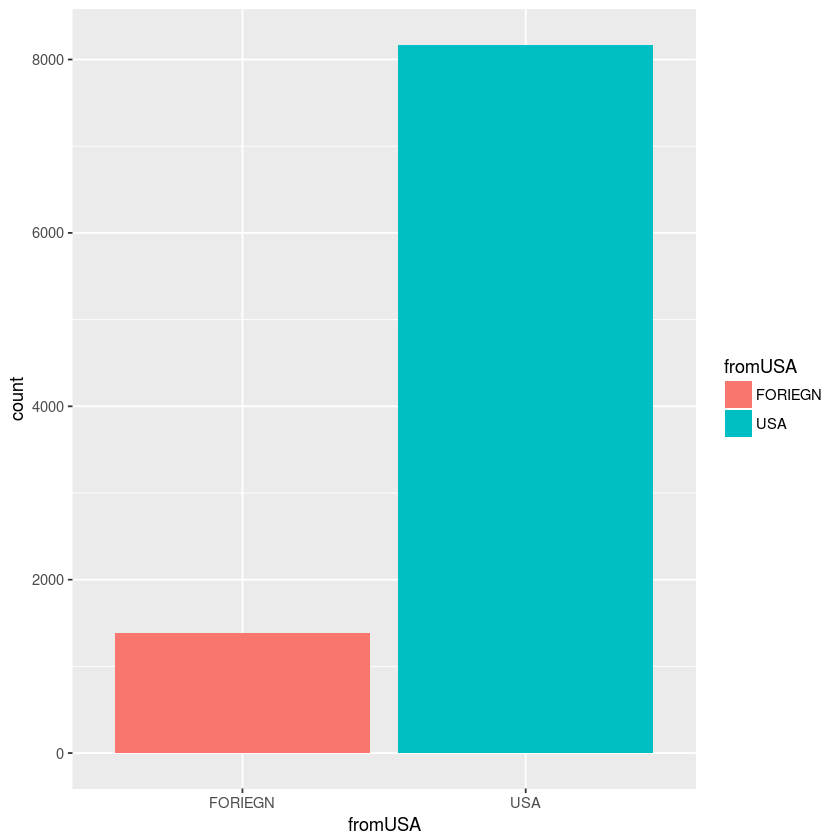

In [41]:
ggplot(data = nba) +
    geom_bar(mapping = aes(x = fromUSA, fill = fromUSA))

The bar chart we just produced is interesting, but does not provide much context to the question we are trying to answer. Has the presence of foreign players in the NBA increased over time? An easy way to answer this question would be to produce a similar bar chart but for each individual season. The facet_wrap() function allows us to do that. It is a way of grouping our visualization by the variable/column we specify after the '~'.

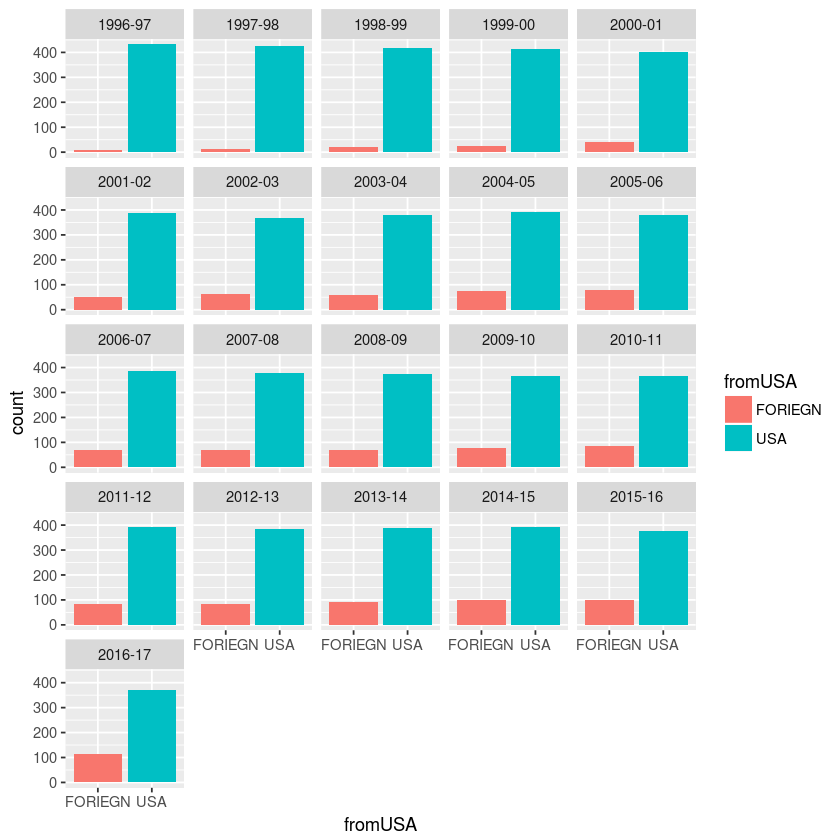

In [42]:
ggplot(data = nba) +
    geom_bar(mapping = aes(x = fromUSA, fill = fromUSA)) + 
    facet_wrap( ~season)

From the above bar charts we can clearly see that the total number of foriegn players in the NBA increases each season. 

#### Question 1

Subset all of the data on foriegn players into a new data set named 'foriegn_nba' and head your data to make sure it is correct.

In [43]:
#your code here


#### Question 2

What are the dimensions of the foriegn nba data set?

In [45]:
#your code here


How many unique countries and players make up the foriegn data set?

In [47]:
#your code here


In [49]:
#your code here


#### Question 3

Use a geom function to produce a plot that represents the relationship of BMI to rebounds for the foriegn nba data set. Have color represent the round in which the player was drafted. Give a brief explanation of your plot. Which geom plot did you go with and why?

In [51]:
#your code here

#explanation

#### Question 4

Use a geom function to produce plot(s) that describe the average points scored by foreign players in the NBA by season. Comment on your findings.
- Note: geom_boxplot() is good for describing means. Also, as sample size grows, the mean becomes closer to the real mean, and recall the number of total foriegn players grew by season.

In [53]:
#your code here

#Comments:

#### Question 5

Use a geom function to produce plot(s) that describe the relationship of points to assists for each season of the foriegn_nba data set.
- Note: The facet_wrap() function will be useful. 


In [55]:
#your code here


<hr>
#### For an .ipynb file of this lab follow <a href="https://github.com/anthonyiarussi/Introduction-to-Data-Science/tree/master/Student%20Labs/Labs%20.ipynb/Lab4" target="_blank">this link</a>.

#### For a .Rmd file of this lab follow <a href="https://github.com/anthonyiarussi/Introduction-to-Data-Science" target="_blank">this link</a>.
<hr>
#### Go to the <a href="https://github.com/anthonyiarussi/Introduction-to-Data-Science" target="_blank">GitHub repository</a>, where you can download a copy of the lab for yourself!